# 衡量回归算法的标准, MSE vs MAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [3]:
boston = datasets.load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu


属性信息（按顺序）：
 -  CRIM：城镇人均犯罪率
 -  ZN：占地面积超过25,000平方英尺的住宅用地比例
 -  INDUS：非零售业务占英亩的比例
 -  CHAS：Charles River虚拟变量（如果管道限制河流则= 1;否则为0）
 -  NOX：一氧化氮浓度（每千万份）
 -  RM：每栋住宅的平均房间数
 - 年龄：1940年以前建造的自住单位比例
 -  DIS：到波士顿五个就业中心的加权距离
 -  RAD：径向高速公路的可达性指数
 - 税：每10,000美元的全额物业税率
 -  PTRATIO：城镇的学生与教师比例
 -  B：1000（Bk  -  0.63）^ 2其中Bk是城镇黑人的比例
 -  LSTAT：人口状况下降％
 -  MEDV：自有房屋的中位数价值1000美元

In [8]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [9]:
x.shape

(506,)

In [10]:
y = boston.target

In [11]:
y.shape

(506,)

<function matplotlib.pyplot.show(*args, **kw)>

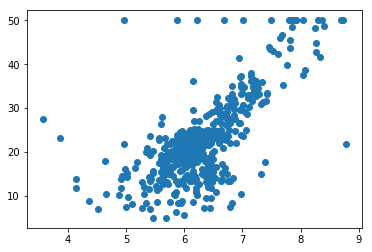

In [13]:
plt.scatter(x,y)
plt.show

# 有很多的边缘数据,魔法数据

In [15]:
np.max(y) # 最大的y值

50.0

In [16]:
x = x[y < 50]
y = y[y < 50]

In [17]:
x.shape

(490,)

In [18]:
y.shape

(490,)

<function matplotlib.pyplot.show(*args, **kw)>

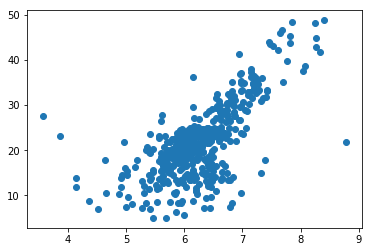

In [19]:
plt.scatter(x,y)
plt.show

## 使用简单回归

In [20]:
import sys
sys.path.append('..')

In [21]:
from ClassicIMPL.linearRegression.SimpleLinearRegression import SimpleLinearRegression2
from ClassicIMPL.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [24]:
x_train.shape

(392,)

In [25]:
y_train.shape

(392,)

In [26]:
x_test.shape

(98,)

In [27]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

In [28]:
reg.a_

8.236482758441626

In [29]:
reg.b_

-29.942166068732185

<function matplotlib.pyplot.show(*args, **kw)>

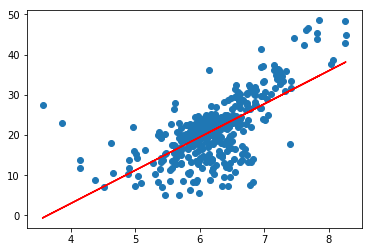

In [32]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')
plt.show

In [34]:
y_hat = reg.predict(x_train)

<function matplotlib.pyplot.show(*args, **kw)>

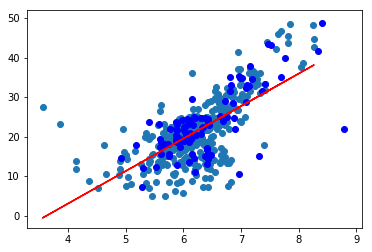

In [36]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='b')
plt.plot(x_train,y_hat,color='r')
plt.show

In [37]:
y_predict = reg.predict(x_test)

## MSE

In [39]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

31.439423481136817

## RMSE

In [41]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

5.607086897947705

## MAE

In [42]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test) 
mae_test

4.103407314854587

## scikitLearn中的MSE和MAE

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [45]:
mean_squared_error(y_predict,y_test)

31.439423481136817

In [47]:
sqrt(mean_squared_error(y_predict,y_test))

5.607086897947705

In [46]:
mean_absolute_error(y_predict,y_test)

4.103407314854587